#Support Vector Machine (SVM)


---

##### Egy Vedriyanto
2117051035

##Library

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix

##Load Data

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/iris.csv")

In [23]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## EDA

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Preprocessing

In [26]:
#ubah variety menjadi tipe data number (secara konteks tetap categorical)
df = df.replace({"variety":{"Setosa":1,"Versicolor":2,"Virginica":3}})
#visualize the new dataset
print(df['variety'].unique())

[1 2 3]


Text(0.5, 1.0, 'Correlation On Iris Classes')

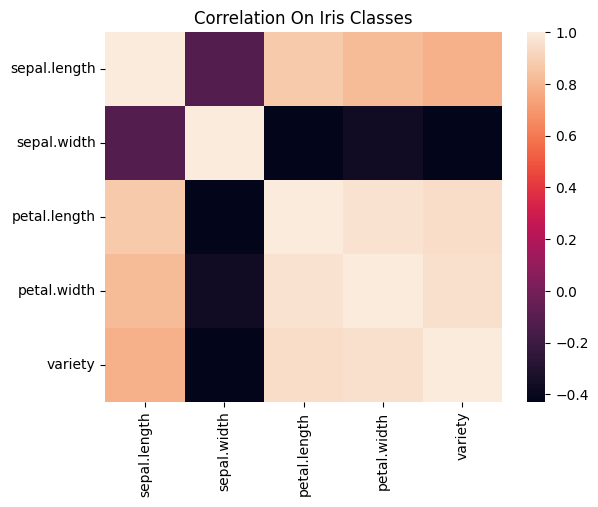

In [27]:
#transform data sebagai correlation visualization
plt.figure(1)
sns.heatmap(df.corr())
plt.title('Correlation On Iris Classes')

In [28]:
#split data menjadi data features (X) dan data target (y)
X = df.iloc[:,:-1]
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modeling

In [29]:
classifier = svm.SVC(kernel = 'linear', random_state = 0)

In [30]:
#fitting model
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [31]:
#prediksi data
y_pred = classifier.predict(X_test)

## Evaluation

In [32]:
#mengevaluasi model menggunakan metode cross validation score
#Evaluasi hasil modeling
scores = cross_val_score(classifier, X_train, y_train, cv = 10)

In [33]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [34]:
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())

Accuracy:  96.0 %
Standard Deviation: +/- 0.05590169943749474


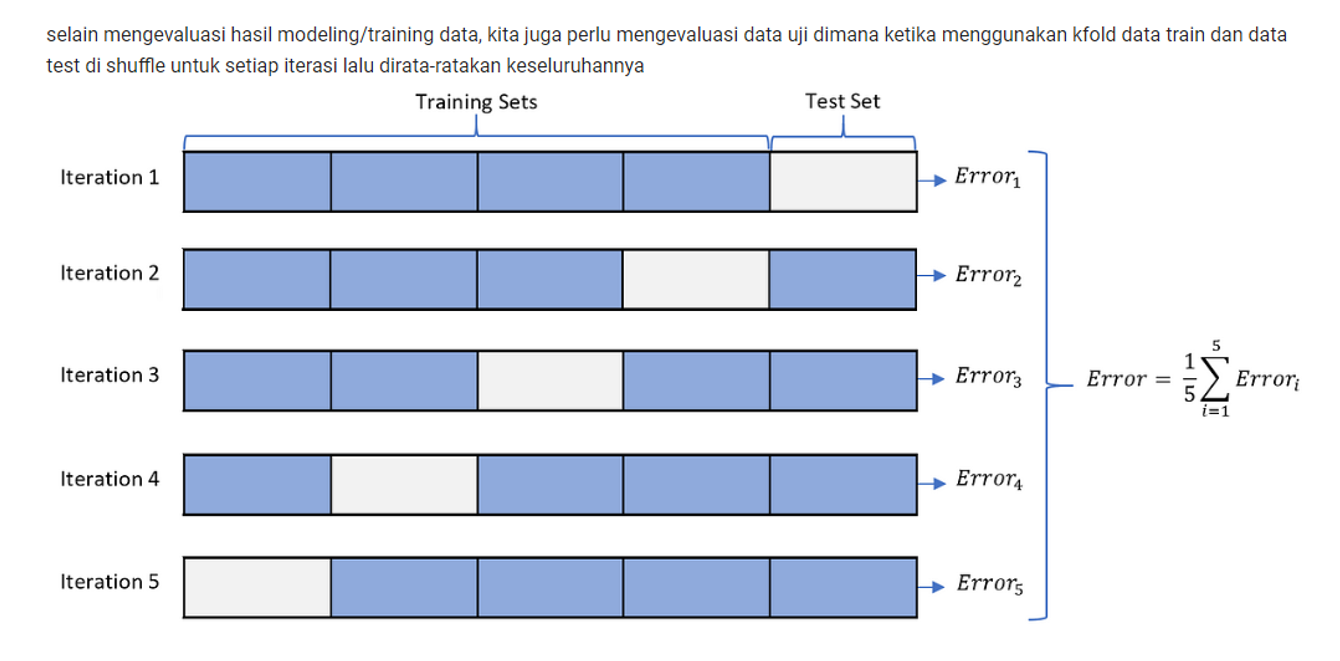

In [35]:
score2 = cross_val_score(classifier, X, y, cv = 10)
print("Accuracy: ", round(scores2.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores2.std())

Accuracy:  97.0 %
Standard Deviation: +/- 0.04422166387140532
